<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from diviner import file_utils as fu, calib, ana_utils as au
reload(au)
import os

In [2]:
rbbtable = calib.RBBTable()

In [3]:
cd '/raid1/maye/coldregions/my_calib'

/raid1/maye/coldregions/my_calib


In [4]:
region1 = pd.read_hdf('region1/region1_my_calib.h5','df')
region3 = pd.read_hdf('region3/region3_my_calib.h5','df')
region5 = pd.read_hdf('region5/region5_my_calib.h5','df')
noradcorr = pd.read_hdf('../no_rad_corr/region1/region1_no_rad_corr.h5',
                        'df')

noradcoor index is different from regionx index??

In [5]:
region1.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2009-07-21 00:22:27.401000, ..., 2013-07-30 14:08:37.587000]
Length: 23374, Freq: None, Timezone: None

In [6]:
noradcorr.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2009-07-08 08:07:07.193000, ..., 2013-07-30 14:08:37.587000]
Length: 23374, Freq: None, Timezone: None

In [7]:
for df in [region1, region3, region5]:
    df['newtb'] = rbbtable.get_tb(df.newrad, 9)
    df['oldtb'] = rbbtable.get_tb(df.radiance, 9)
noradcorr['noradcorr'] = rbbtable.get_tb(noradcorr.newrad, 9)

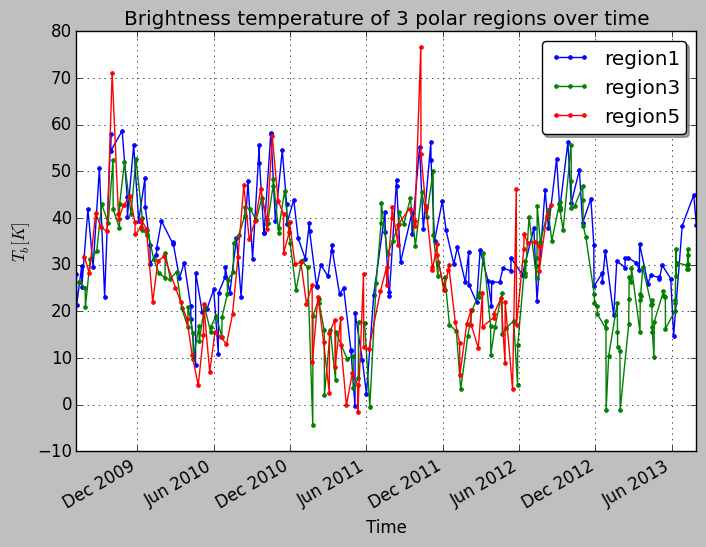

In [8]:
for i,df in zip([1,3,5],[region1, region3, region5]):
    df['newtb'].resample('12h').dropna().plot(style='.-',
                                              label='region'+str(i))
legend(loc='best')
plt.ylabel('$T_b [K]$')
xlabel('Time')
title("Brightness temperature of 3 polar regions over time")
savefig('/u/paige/maye/src/diviner/plots/all_regions.png',dpi=300)

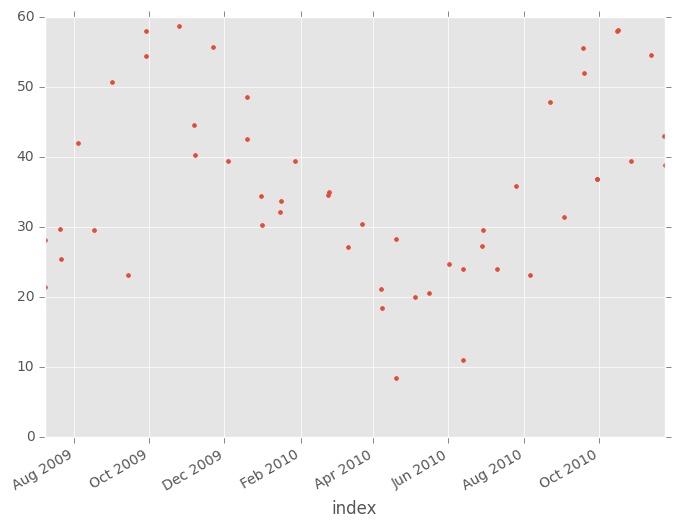

In [18]:
region1.resample('12h')['newtb'].loc[:'20101201'].dropna().plot(style='.')

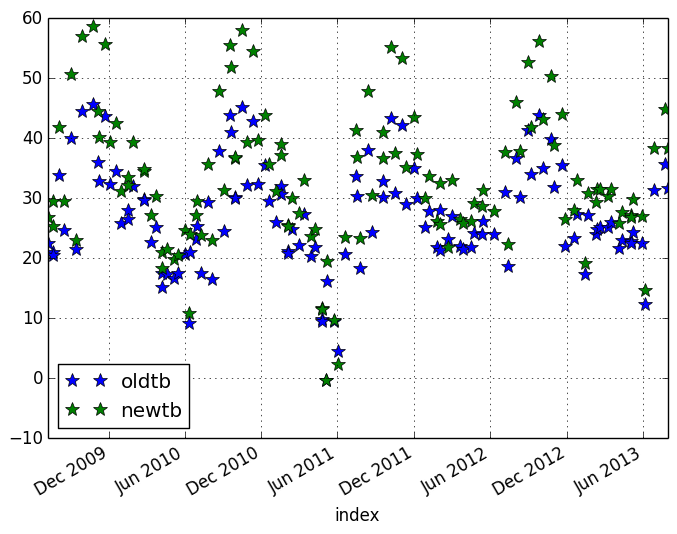

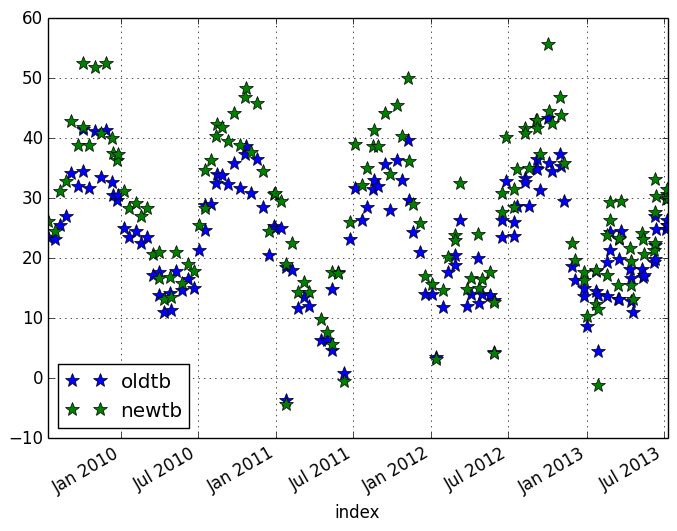

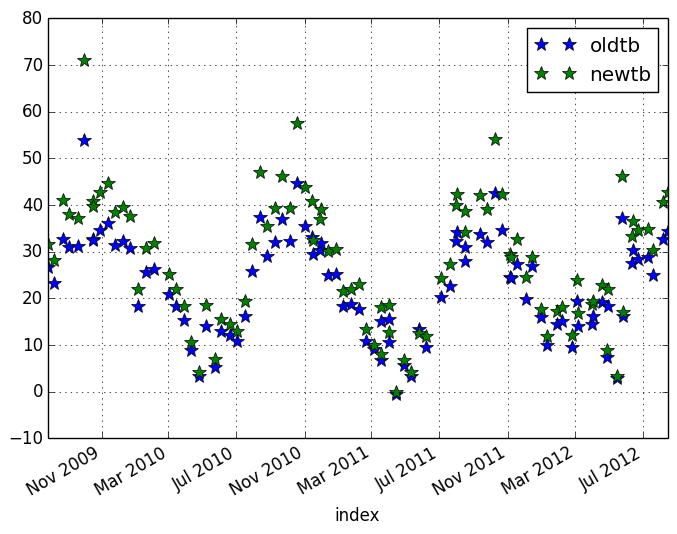

In [20]:
for df in [region1, region3, region5]:
    df[['oldtb','newtb']].resample('1d').dropna().plot(style='*',ms=10,legend=False)
    legend(loc='best')
# noradcoor.noradcorr.resample('1d').plot(style='*',ms=10,legend=False)


In [18]:
from scipy.interpolate import UnivariateSpline

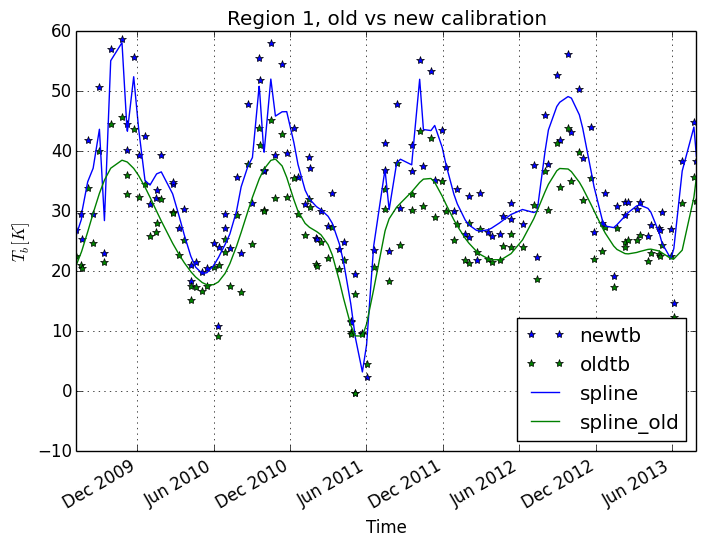

In [48]:
df = region1
tmp = df.resample('1d').dropna()
x = tmp.index.values.astype('float')
splinernew = UnivariateSpline(x, tmp.newtb, s=3e3)
splinerold = UnivariateSpline(x, tmp.oldtb, s=3e3)
tmp['spline'] = splinernew(x)
tmp['spline_old'] = splinerold(x)
tmp['newtb'].plot(style='*')
tmp['oldtb'].plot(style='*')
tmp['spline'].plot(color='blue')
tmp['spline_old'].plot(color='green')
legend(loc='best')
plt.ylabel('$T_b [K]$')
xlabel('Time')
title("Region 1, old vs new calibration")
savefig('/u/paige/maye/src/diviner/plots/region1.pdf')

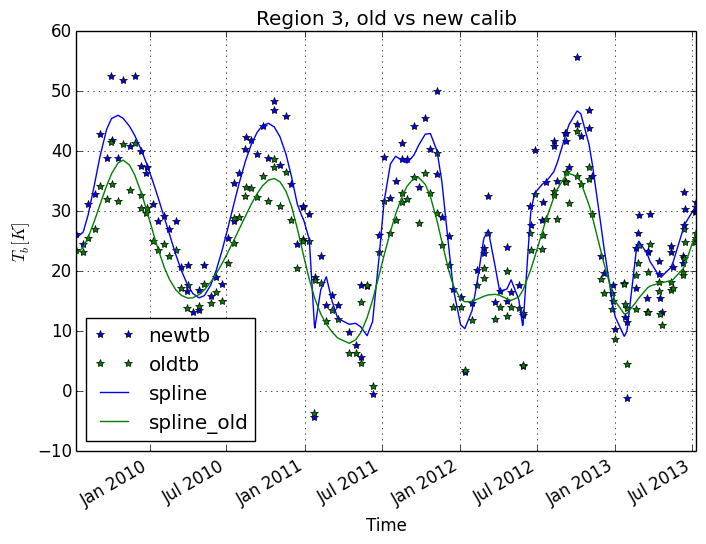

In [49]:
df = region3
tmp = df.resample('1d').dropna()
x = tmp.index.values.astype('float')
spliner = UnivariateSpline(x, tmp.newtb, s=3e3)
splinerold = UnivariateSpline(x, tmp.oldtb, s=3e3)
tmp['spline'] = spliner(x)
tmp['spline_old'] = splinerold(x)
tmp['newtb'].plot(style='*')
tmp['oldtb'].plot(style='*')
tmp['spline'].plot(color='blue')
tmp['spline_old'].plot(color='green')
legend(loc='best')
plt.ylabel('$T_b [K]$')
xlabel('Time')
title('Region 3, old vs new calib')
savefig('/u/paige/maye/src/diviner/plots/region3.pdf')

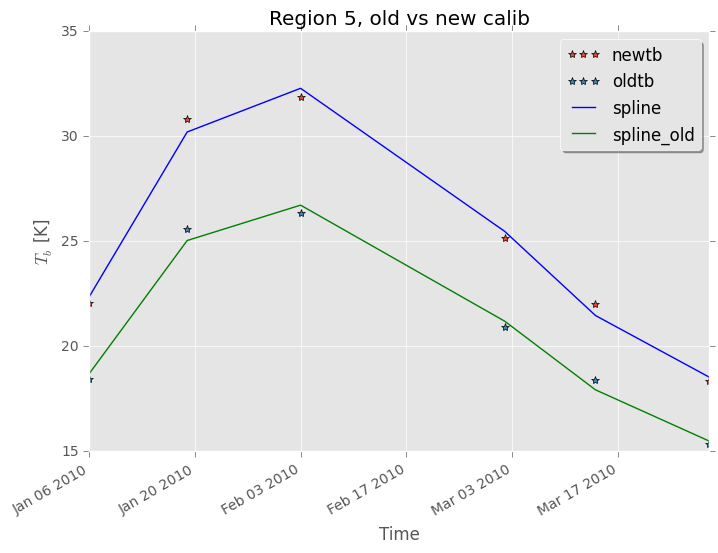

In [49]:
from scipy.interpolate import UnivariateSpline
df = region5
tmp = df.resample('1d')['20100101':'20100401'].dropna()
x = tmp.index.values.astype('float')
spliner = UnivariateSpline(x, tmp.newtb, s=3e3)
splinerold = UnivariateSpline(x, tmp.oldtb, s=3e3)
tmp['spline'] = spliner(x)
tmp['spline_old'] = splinerold(x)
tmp['newtb'].plot(style='*')
tmp['oldtb'].plot(style='*')
tmp['spline'].plot(color='blue')
tmp['spline_old'].plot(color='green')
legend(loc='best')
plt.ylabel('$T_b$ [K]')
xlabel('Time')
title('Region 5, old vs new calib')
savefig('/u/paige/maye/src/diviner/plots/region5.pdf')

In [10]:
region1.columns

Index([u'det', u'newrad', u'radiance', u'newtb', u'oldtb'], dtype='object')

In [13]:
mpl.style.use('ggplot')

In [63]:
region5['20100125':'20100205']

,det,newrad,radiance,newtb,oldtb
index,,,,,
2010-02-03 01:34:51.494000,12,0.027103,0.0148,38.097934,31.116222
2010-02-03 01:34:51.622000,12,0.023415,0.0127,36.191257,29.670545
2010-02-03 01:34:51.750000,12,0.030810,0.0169,39.905477,32.456829
2010-02-03 01:34:51.878000,12,-0.002556,-0.0018,-19.226682,-17.678379
2010-02-03 01:34:52.006000,12,0.012327,0.0065,29.401740,24.446095
2010-02-03 01:34:51.366000,13,0.025868,0.0139,37.470317,30.507685
2010-02-03 01:34:51.494000,13,0.013683,0.0071,30.359166,25.056722
2010-02-03 01:34:51.622000,13,0.013691,0.0071,30.364831,25.056722
2010-02-03 01:34:51.750000,13,0.042107,0.0229,44.944035,35.916292


In [30]:
region1['times'] = region1.index

In [35]:
idx = region1.times.unique()

In [39]:
s = pd.Series(idx,index=idx)

In [40]:
s['20100501':'20100701']

2010-05-05 08:05:48.865000   2010-05-05 08:05:48.865000
2010-05-05 08:05:48.993000   2010-05-05 08:05:48.993000
2010-05-05 08:05:49.121000   2010-05-05 08:05:49.121000
2010-05-05 08:05:49.249000   2010-05-05 08:05:49.249000
2010-05-05 08:05:49.377000   2010-05-05 08:05:49.377000
2010-05-05 08:05:49.505000   2010-05-05 08:05:49.505000
2010-05-05 08:05:49.633000   2010-05-05 08:05:49.633000
2010-05-05 08:05:48.737000   2010-05-05 08:05:48.737000
2010-05-05 08:05:49.761000   2010-05-05 08:05:49.761000
2010-05-05 08:05:48.609000   2010-05-05 08:05:48.609000
2010-05-05 08:05:49.889000   2010-05-05 08:05:49.889000
2010-05-05 08:05:48.481000   2010-05-05 08:05:48.481000
2010-05-05 08:05:50.017000   2010-05-05 08:05:50.017000
2010-05-05 06:12:41.454000   2010-05-05 06:12:41.454000
2010-05-05 06:12:41.582000   2010-05-05 06:12:41.582000
...
2010-06-28 23:56:49.448000   2010-06-28 23:56:49.448000
2010-06-28 23:56:50.344000   2010-06-28 23:56:50.344000
2010-06-28 23:56:50.472000   2010-06-28 23:5

In [78]:
temps = linspace(10, 300, 100)
radiances = rbbtable.get_radiance(temps, 9)
norm_to_abs_converter = pd.read_pickle('/u/paige/maye/src/diviner/diviner/data/Normalized_to_Absolute_Radiance.df')
norm_to_abs_converter.columns = calib.thermal_channels
radiances *= norm_to_abs_converter.get_value(2, 'b3')

In [79]:
dR_dT = np.gradient(radiances)

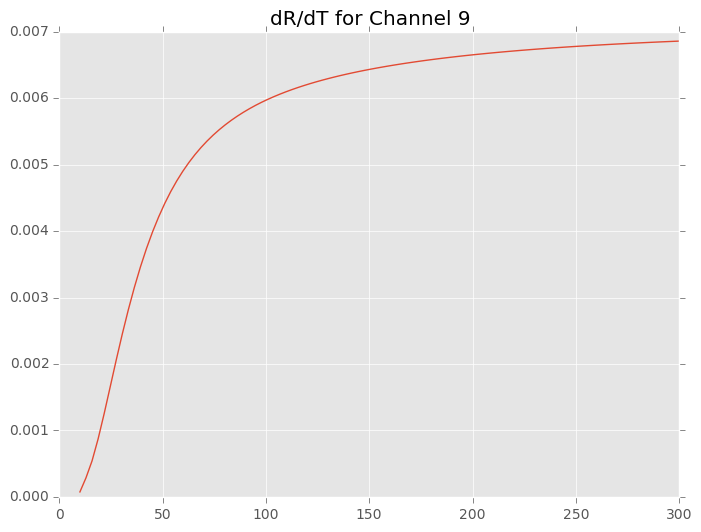

In [80]:
plot(temps, dR_dT)
title("dR/dT for Channel 9")
savefig('/u/paige/maye/plots/dR_dT_ch9.png')